In [2426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2427]:
data = pd.read_csv('./sample_data/titanic.csv', usecols=['survived', 'age', 'fare'])
data.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#   Tính toán độ chính xác của một mô hình logistic regression trên tập dữ liệu huấn luyện và kiểm tra đã được chia ra
* X_train: là tập dữ liệu huấn luyện cho các thuộc tính đầu vào
* X_test: là tập dữ liệu kiểm tra cho các thuộc tính đầu vào
* y_train: là tập nhãn huấn luyện tương ứng với X_train
* y_test: là tập nhãn kiểm tra tương ứng với X_test

In [2428]:
# 
def accuracy_score_function(X_train, X_test, y_train, y_test):
    lr = LogisticRegression() #Tạo một mô hình Logistic Regression với các giá trị mặc định.
    lr.fit(X_train, y_train) # Đưa dữ liệu huấn luyện X_train và nhãn huấn luyện y_train vào để huấn luyện mô hình lr.
    y_pred = lr.predict(X_test) #Sử dụng mô hình lr đã huấn luyện để dự đoán nhãn của dữ liệu X_test. ( nhãn dự đoán)
    accuracy = accuracy_score(y_test, y_pred)  #y_test(nhãn thực tế)
    #Tính toán độ chính xác của mô hình bằng cách so sánh nhãn thực tế của y_test và nhãn dự đoán của y_pred, 
    #sử dụng hàm accuracy_score từ thư viện sklearn.metrics
    return accuracy


# Các phương pháp xử lý dữ liệu trống

* Xử lý dữ liệu bị thiếu trong cột 'age' trong tập huấn luyện X_train và tập kiểm tra X_test.

In [2429]:
def dt_mean(X_train, X_test):
    dt_train_mean = X_train['age'].dropna().mean()
    X_train['age'] = X_train['age'].fillna(dt_train_mean)
    X_test['age'] = X_test['age'].fillna(dt_train_mean)
    return X_train, X_test

In [2430]:
def dt_median(X_train,X_test):
    dt_train_median=X_train['age'].dropna().median() #loại bỏ các giá trị null trước khi tính trung vị
    X_train['age'] = X_train['age'].fillna(dt_train_median) #điền các giá trị null của cột 'age' trong X_train bằng giá trị trung vị dt_train_median đã tính 
    X_test['age'] = X_test['age'].fillna(dt_train_median) #điền các giá trị null của cột 'age' trong X_test bằng giá trị trung vị 
    return X_train, X_test

In [2431]:
def dt_mode(X_train,X_test):
    dt_train_mode=X_train['age'].dropna().mode()[0]
    X_train['age'] = X_train['age'].fillna(dt_train_mode)
    X_test['age'] = X_test['age'].fillna(dt_train_mode)
    return X_train, X_test

In [2432]:
def dt_random(X_train, X_test):
    np.random.seed(42)
    random_train = np.random.choice(X_train['age'].dropna(), size=X_train['age'].isnull().sum(), replace=True)
    random_test = np.random.choice(X_test['age'].dropna(), size=X_test['age'].isnull().sum(), replace=True)
    X_train.loc[X_train['age'].isnull(), 'age'] = random_train
    X_test.loc[X_test['age'].isnull(), 'age'] = random_test
    return X_train, X_test

In [2433]:
#Thay thế bằng giá trị đuôi của phân bố (End of distribution imputation)
def eod_imputation(X_train, X_test):
    eod = X_train['age'].mean() + 3 * X_train['age'].std()
    X_train['age'] = X_train['age'].fillna(eod)
    X_test['age'] = X_test['age'].fillna(eod)
    return X_train, X_test


In [2434]:

def arbitrary_imputation(X_train, X_test):
    value_arbitrary = np.random.randint(23, 38)
    X_train['age'].fillna(value_arbitrary, inplace=True)
    X_test['age'].fillna(value_arbitrary, inplace=True)
    return X_train, X_test


In [2435]:
def createNewFeature(X_train,X_test):
    X_train.loc[X_train['age'].isnull(),'ageNaN'] = 1
    X_test.loc[X_test['age'].isnull(),'ageNaN'] = 1
    mean = X_train[['age','fare','ageNaN']].mean()
    return X_train[['age','fare','ageNaN']].fillna(mean),X_test[['age','fare','ageNaN']].fillna(mean)

# Trường hợp không xử lý ngoại lệ

In [2436]:
def evaluate_data_processing(X, y, data_processing_func, n_trials=10, **kwargs):
    sum_acc = 0
    for i in range(n_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        X_train_processed, X_test_processed = data_processing_func(X_train, X_test, **kwargs)
        acc = accuracy_score_function(X_train_processed, X_test_processed, y_train, y_test)
        sum_acc += acc
    avg_acc = sum_acc / n_trials
    print(data_processing_func.__name__, "(average accuracy) : ", avg_acc,)
    return avg_acc


In [2437]:
X = data[['age', 'fare']]
y = data['survived']
No_outlier_mean = evaluate_data_processing(X, y, dt_mean)
No_outlier_median = evaluate_data_processing(X, y, dt_median)
No_outlier_mode = evaluate_data_processing(X, y, dt_mode)
No_outlier_random = evaluate_data_processing(X, y, dt_random)
No_outlier_eod = evaluate_data_processing(X, y, eod_imputation)
No_outlier_arbitrary= evaluate_data_processing(X, y, arbitrary_imputation)
No_outlier_createnew = evaluate_data_processing(X, y, createNewFeature)

dt_mean (average accuracy) :  0.6585820895522387
dt_median (average accuracy) :  0.6578358208955224
dt_mode (average accuracy) :  0.6608208955223881
dt_random (average accuracy) :  0.6667910447761194
eod_imputation (average accuracy) :  0.6708955223880597
arbitrary_imputation (average accuracy) :  0.6608208955223881
createNewFeature (average accuracy) :  0.6589552238805969


  # Trường hợp Có xử lý ngoại lệ (đồng thời trên 2 biến Age và Fare)

In [2438]:
def outlier_process(X_train, X_test):
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    age_Q1 = X_train_processed['age'].quantile(0.25)
    age_Q3 = X_train_processed['age'].quantile(0.75)
    age_IQR = age_Q3 - age_Q1
    age_lower_threshold = age_Q1 - 1.5 * age_IQR
    age_upper_threshold = age_Q3 + 1.5 * age_IQR

    X_train_processed = X_train_processed[(X_train_processed['age'] > age_lower_threshold) & (X_train_processed['age'] < age_upper_threshold)]
    X_test_processed = X_test_processed[(X_test_processed['age'] > age_lower_threshold) & (X_test_processed['age'] < age_upper_threshold)]

    fare_Q1 = X_train_processed['fare'].quantile(0.25)
    fare_Q3 = X_train_processed['fare'].quantile(0.75)
    fare_IQR = fare_Q3 - fare_Q1
    fare_lower_threshold = fare_Q1 - 1.5 * fare_IQR
    fare_upper_threshold = fare_Q3 + 1.5 * fare_IQR

    X_train_processed = X_train_processed[(X_train_processed['fare'] > fare_lower_threshold) & (X_train_processed['fare'] < fare_upper_threshold)]
    X_test_processed = X_test_processed[(X_test_processed['fare'] > fare_lower_threshold) & (X_test_processed['fare'] < fare_upper_threshold)]

    return X_train_processed, X_test_processed


In [2439]:
sum=0
for i in range (10): 
#thực hiện 10 lần lặp mỗi lần sử dụng một giá trị random_state khác nhau để 
#chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 70:30.
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    dt_mean(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
    data_outlier_mean=sum/10


In [2440]:
sum=0
for i in range (10):
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    dt_median(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
data_outlier_median=sum/10

In [2441]:
sum=0
for i in range (10):
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    dt_mode(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
    data_outlier_mode=sum/10

In [2442]:
sum=0
for i in range (10):
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    dt_random(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
    data_outlier_random=sum/10

In [2443]:
sum=0
for i in range (10):
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    eod_imputation(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
    data_outlier_eod=sum/10

In [2444]:
sum=0
for i in range (10):
    X=data[['age','fare']].copy()
    y=data['survived']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    arbitrary_imputation(X_train,X_test)
    outlier_process(X_train,X_test)
    sum=sum+accuracy_score_function(X_train,X_test,y_train,y_test)
    data_outlier_arbitrary_imputation=sum/10

In [2445]:
print("Outlier_mean :" ,data_outlier_mean)
print("Outlier_median :" ,data_outlier_median)
print("Outlier_mode :" ,data_outlier_mode)
print("Outlier_random :" ,data_outlier_random)
print("Outlier_arbitrary_imputation :" ,data_outlier_arbitrary_imputation)
print("Outlier_eod_imputation :" ,data_outlier_eod)


Outlier_mean : 0.6585820895522387
Outlier_median : 0.6578358208955224
Outlier_mode : 0.6608208955223881
Outlier_random : 0.6667910447761194
Outlier_arbitrary_imputation : 0.6608208955223881
Outlier_eod_imputation : 0.6708955223880597


In [2446]:
import pandas as pd

accuracy_no_outlier_process = {
  'mean': (No_outlier_mean )*100,
  'median': (No_outlier_median)*100,
  'mode': (No_outlier_mode )*100,
  'random': (No_outlier_random)*100,
  'end of distribution': (No_outlier_eod )*100,
  'arbitrary': (No_outlier_arbitrary)*100
}

accuracy_outlier_process = {
  'mean': data_outlier_mean *100,
  'median': data_outlier_median*100,
  'mode': data_outlier_mode*100,
  'random': data_outlier_random*100,
  'end of distribution': data_outlier_eod *100,
  'arbitrary': data_outlier_arbitrary_imputation*100
}

df = pd.DataFrame({'No outlier process': accuracy_no_outlier_process, 'Outlier process': accuracy_outlier_process})

# Tô màu gradient
df.style.background_gradient(cmap='Greens')


,No outlier process,Outlier process
mean,65.858209,65.858209
median,65.783582,65.783582
mode,66.082090,66.082090
random,66.679104,66.679104
end of distribution,67.089552,67.089552
arbitrary,66.082090,66.082090


In [2447]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import (
    MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler,
    Normalizer, QuantileTransformer, PowerTransformer
)

In [2448]:
def split_data(data):
    X=data[['age','fare']].copy()
    y=data['survived']
    return train_test_split(X, y, test_size=0.3, stratify=y)


In [2449]:
def preprocess_data(X_train, X_test):
     dt_mode(X_train, X_test)
     outlier_process(X_train, X_test)

In [2450]:
def scaler_transform(X_train, X_test, scaler_type):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'min_max':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxabs':
        scaler = MaxAbsScaler()
    elif scaler_type == 'norma':
        scaler = Normalizer()
    elif scaler_type == 'quantil':
        scaler = QuantileTransformer(n_quantiles=620)
    elif scaler_type == 'powert':
        scaler = PowerTransformer()
    else:
        raise ValueError('Scaler not recognized')
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return X_train, X_test

In [2451]:
def evaluate_performance(X_train, X_test, y_train, y_test):
    return accuracy_score_function(X_train, X_test, y_train, y_test)

In [2452]:
def ChuanHoa(scaler):
    sum_acc = 0
    for i in range (10):
        X_train, X_test, y_train, y_test = split_data(data)
        dt_mode(X_train, X_test)
        X_train, X_test = scaler_transform(X_train, X_test, scaler)
        accuracy_score_function(X_train, X_test, y_train, y_test)
        sum_acc += accuracy_score_function(X_train, X_test, y_train, y_test)
        avg=sum_acc/10
    return avg

In [2453]:
stand_no_outlier = ChuanHoa('standard')
minmax_no_outlier = ChuanHoa('min_max')
robus_no_outlier = ChuanHoa('robust')
maxabs_no_outlier = ChuanHoa('maxabs')
norma_no_outlier = ChuanHoa('norma')
quantil_no_outlier = ChuanHoa('quantil')
powert_no_outlier = ChuanHoa('powert')

In [2454]:
print("No_Outlier_Standard :" ,stand_no_outlier)
print("No_Outlier_MinMax :" ,minmax_no_outlier)
print("No_Outlier_Robus :" ,robus_no_outlier)
print("No_Outlier_Maxabs :" ,maxabs_no_outlier)
print("No_Outlier_Norma :" ,norma_no_outlier)
print("No_Outlier_Quantil :" ,quantil_no_outlier)
print("No_Outlier_Powert :" ,powert_no_outlier)

No_Outlier_Standard : 0.6682835820895523
No_Outlier_MinMax : 0.6511194029850746
No_Outlier_Robus : 0.6604477611940298
No_Outlier_Maxabs : 0.6514925373134328
No_Outlier_Norma : 0.6776119402985075
No_Outlier_Quantil : 0.6555970149253731
No_Outlier_Powert : 0.675


In [2455]:
def ChuanHoa2(scaler):
    sum_acc = 0
    for i in range(10):
        X_train, X_test, y_train, y_test = split_data(data)
        dt_mode(X_train, X_test)
        outlier_process(X_train, X_test)
        X_train_scaled, X_test_scaled = scaler_transform(X_train, X_test, scaler)
        acc = accuracy_score_function(X_train_scaled, X_test_scaled, y_train, y_test)
        sum_acc += acc
        avg_acc = sum_acc / 10
    return avg_acc


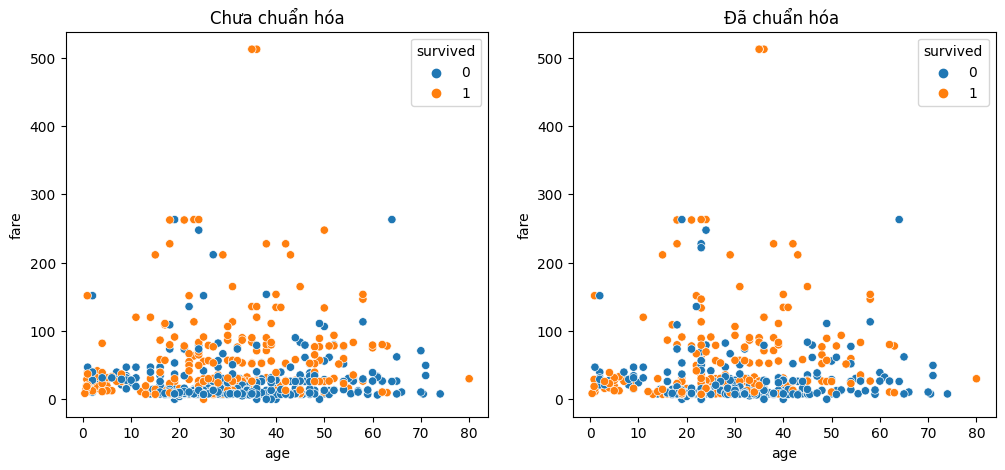

In [2456]:
import seaborn as sns

# Tạo DataFrame mới chứa thông tin về age, fare, và survived
df = pd.concat([X_train[['age', 'fare']], y_train], axis=1)

# Thiết lập kích thước figure
plt.figure(figsize=(12, 5))

# Vẽ biểu đồ scatterplot cho DataFrame gốc
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='age', y='fare', hue='survived')
plt.title('Chưa chuẩn hóa')

# Vẽ biểu đồ scatterplot cho DataFrame đã chuẩn hóa
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title('Đã chuẩn hóa ')

# Hiển thị đồ thị
plt.show()


* Đồ thị thứ nhất (Chưa chuẩn hóa) cho thấy sự phân bố của hai cột dữ liệu "age" và "fare" trên một mặt phẳng và được phân tách theo trạng thái sống hay chết của hành khách ("survived"). Tuy nhiên, dữ liệu chưa được chuẩn hóa nên sự phân bố của dữ liệu giữa các trục x và y không đồng đều.

* Đồ thị thứ hai (Đã chuẩn hóa) cho thấy sự phân bố của hai cột dữ liệu "age" và "fare" đã được chuẩn hóa trên cùng một khoảng giá trị trên trục x và y, tạo ra một sự phân bố dữ liệu đồng đều. Việc chuẩn hóa dữ liệu giúp cho các giá trị trong dữ liệu phân bố đồng đều hơn và tránh tình trạng các giá trị ở một trong các trục chiếm ưu thế khi phân tích và đánh giá.

In [2457]:
stand_outlier = ChuanHoa2('standard')
minmax_outlier = ChuanHoa2('min_max')
robus_outlier = ChuanHoa2('robust')
maxabs_outlier = ChuanHoa2('maxabs')
norma_outlier = ChuanHoa2('norma')
quantil_outlier = ChuanHoa2('quantil')
powert_outlier = ChuanHoa2('powert')

In [2458]:
print("Outlier_Standard :" ,stand_outlier)
print("Outlier_MinMax :" ,minmax_outlier)
print("Outlier_Robus :" ,robus_outlier)
print("Outlier_Maxabs :" ,maxabs_outlier)
print("Outlier_Norma :" ,norma_outlier)
print("Outlier_Quantil :" ,quantil_outlier)
print("Outlier_Powert :" ,powert_outlier)

Outlier_Standard : 0.6563432835820896
Outlier_MinMax : 0.6451492537313432
Outlier_Robus : 0.6604477611940298
Outlier_Maxabs : 0.6511194029850745
Outlier_Norma : 0.6817164179104477
Outlier_Quantil : 0.6697761194029851
Outlier_Powert : 0.666044776119403


# Biểu đồ scatter thể hiện sự tương quan giữa tuổi (age) và giá vé (fare) của các hành khách trên chuyến tàu Titanic trước và sau khi chuẩn hóa dữ liệu.

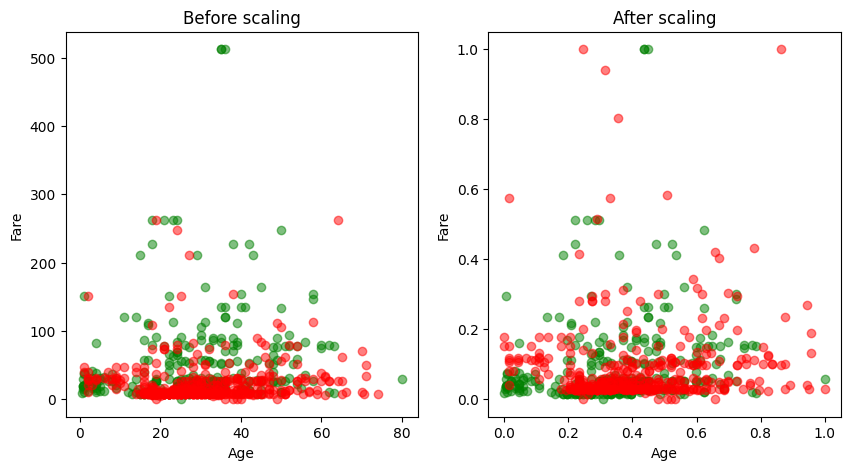

In [2459]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Tạo dataframe df với các cột là age, fare, survived
df = data[['age', 'fare', 'survived']]

# Chia dataframe df thành 2 dataframe df_survived và df_dead dựa trên cột survived
df_survived = df[df['survived'] == 1]
df_dead = df[df['survived'] == 0]

# Khởi tạo scaler để chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trên cả 2 dataframe df_survived và df_dead
df_survived_scaled = scaler.fit_transform(df_survived[['age', 'fare']])
df_dead_scaled = scaler.fit_transform(df_dead[['age', 'fare']])

# Vẽ biểu đồ tương quan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(df_survived['age'], df_survived['fare'], c='green', alpha=0.5)
ax[0].scatter(df_dead['age'], df_dead['fare'], c='red', alpha=0.5)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')
ax[0].set_title('Before scaling')

ax[1].scatter(df_survived_scaled[:, 0], df_survived_scaled[:, 1], c='green', alpha=0.5)
ax[1].scatter(df_dead_scaled[:, 0], df_dead_scaled[:, 1], c='red', alpha=0.5)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Fare')
ax[1].set_title('After scaling')

plt.show()


* Biểu đồ đầu tiên ("Before scaling") hiển thị dữ liệu chưa được chuẩn hóa và được phân thành hai nhóm màu đỏ và xanh lá cây tương ứng với các hành khách đã chết và sống sót.

* Biểu đồ thứ hai ("After scaling") hiển thị dữ liệu đã được chuẩn hóa trên cả hai trục, trong đó giá trị trên mỗi trục đã được chuyển đổi để phù hợp với khoảng giá trị [0, 1]. Dữ liệu được phân thành hai nhóm màu đỏ và xanh lá cây tương ứng với các hành khách đã chết và sống sót.

* => Sau khi chuẩn hóa, các giá trị dữ liệu trên cả hai trục đã được đưa về cùng khoảng giá trị và do đó, dễ dàng hơn trong việc so sánh và phân tích.

In [2460]:
import pandas as pd

accuracy_no_outlier_process = {
  'StandardScaler': (stand_no_outlier )*100,
  'MinMaxScaler': (minmax_no_outlier)*100,
  'RobustScaler': (robus_no_outlier )*100,
  'MaxAbsScaler': (maxabs_no_outlier)*100,
  'Normalizer': (norma_no_outlier )*100,
  'QuantileTransformer': (quantil_no_outlier)*100,
  'PowerTransformer': (powert_no_outlier)*100
}

accuracy_outlier_process = {
  'StandardScaler': (stand_outlier )*100,
  'MinMaxScaler': (minmax_outlier)*100,
  'RobustScaler': (robus_outlier )*100,
  'MaxAbsScaler': (maxabs_outlier)*100,
  'Normalizer': (norma_outlier )*100,
  'QuantileTransformer': (quantil_outlier)*100,
  'PowerTransformer': (powert_outlier)*100
}

df = pd.DataFrame({'No outlier process': accuracy_no_outlier_process, 'Outlier process': accuracy_outlier_process})

# Tô màu gradient
df.style.background_gradient(cmap='Greens')


,No outlier process,Outlier process
StandardScaler,66.828358,65.634328
MinMaxScaler,65.111940,64.514925
RobustScaler,66.044776,66.044776
MaxAbsScaler,65.149254,65.111940
Normalizer,67.761194,68.171642
QuantileTransformer,65.559701,66.977612
PowerTransformer,67.500000,66.604478


In [2461]:
import pandas as pd

accuracy_no_outlier_process = {
  'mode': No_outlier_mode*100,
}
accuracy_outlier_process = {
  'mode': data_outlier_mode*100,
}
accuracy_z_score_outlier_process = {
  'mode': stand_outlier*100,
}
accuracy_min_max_outlier_process = {
  'mode': minmax_outlier*100
}
accuracy_robust_outlier_process = {
  'mode': robus_outlier*100,
}
accuracy_maxabs_outlier_process = {
  'mode': maxabs_outlier*100,
}
accuracy_norma_outlier_process = {
  'mode': norma_outlier*100,
}
df = pd.DataFrame({
  'No outlier process': accuracy_no_outlier_process,
  'Outlier process': accuracy_outlier_process,
  'Normalize to Z-score': accuracy_z_score_outlier_process,
  'Normalize to Min-max': accuracy_min_max_outlier_process,
  'Normalize to Robust': accuracy_robust_outlier_process,
  'Normalize to MaxAbsScaler': accuracy_maxabs_outlier_process,
  'Normalize to Normalizer': accuracy_norma_outlier_process
})

# Tô màu gradient
df.style.background_gradient(cmap='Reds')


,No outlier process,Outlier process,Normalize to Z-score,Normalize to Min-max,Normalize to Robust,Normalize to MaxAbsScaler,Normalize to Normalizer
mode,66.082090,66.082090,65.634328,64.514925,66.044776,65.111940,68.171642


# Bài 8.1

In [2462]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest


In [2463]:
df = pd.read_csv('./sample_data/titanic.csv')

# Select features and target
X = df[['age','fare','sex']]
y = df['survived']


Pipelines trong đoạn mã này bao gồm:
* SimpleImputer: Thực hiện điền giá trị thiếu bằng giá trị trung bình của các mẫu (đối với các cột 'age' và 'fare').
* OneHotEncoder: Mã hóa giới tính ('sex') dưới dạng one-hot encoding và giữ lại tất cả các cột khác.
* LogisticRegression: Mô hình hồi quy logistic được sử dụng để dự đoán xác suất sống sót trên tàu Titanic.

In [2472]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

def get_pipeline(scaler=None):
    preprocessor = make_column_transformer(
        (SimpleImputer(strategy='median'), ['age', 'fare']),
        (OneHotEncoder(), ['sex']),
    )

    if scaler is None:
        pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
    else:
        pipeline = make_pipeline(preprocessor, scaler(), LogisticRegression(max_iter=1000))

    return pipeline


In [2473]:
scalers = [StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, MaxAbsScaler]

for scaler in scalers:
    pipeline = get_pipeline(scaler)
    scoring = ['accuracy']
    results = cross_validate(pipeline, X, y, cv = 5, scoring = scoring)
    accuracy = np.mean(results['test_accuracy'])
    print(f'Average accuracy of pipeline ({scaler.__name__ if scaler is not None else "None"}): {accuracy}')


Average accuracy of pipeline (StandardScaler): 0.7822547234950725
Average accuracy of pipeline (MinMaxScaler): 0.7878664239532986
Average accuracy of pipeline (RobustScaler): 0.7822547234950725
Average accuracy of pipeline (Normalizer): 0.6914631849852488
Average accuracy of pipeline (QuantileTransformer): 0.7856192329420627
Average accuracy of pipeline (PowerTransformer): 0.7856255100119265
Average accuracy of pipeline (MaxAbsScaler): 0.7878664239532986


# Bài 8.2

In [2476]:
  from sklearn.model_selection import train_test_split, GridSearchCV
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score
  from sklearn.impute import SimpleImputer
  from sklearn.pipeline import make_pipeline
  from sklearn.preprocessing import StandardScaler, OneHotEncoder
  from sklearn.compose import make_column_transformer
  import pandas as pd

  df = pd.read_csv('./sample_data/titanic.csv', usecols=['survived', 'age', 'fare', 'sex'])

  X_train, X_test, y_train, y_test = train_test_split(df[['age', 'fare', 'sex']], df['survived'], test_size=0.3, random_state=10)

  preprocessor = make_column_transformer(
  (SimpleImputer(strategy='median'), ['age', 'fare']),
  (OneHotEncoder(), ['sex']),
  )

  pipeline = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(max_iter=1000))

  parameters = {
  'logisticregression__penalty': ['l1', 'l2'],
  'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
  'logisticregression__solver': ['liblinear']
  }

  clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, error_score='raise')
  clf.fit(X_train, y_train)

  best_model = clf.best_estimator_
  best_model.fit(X_train, y_train)

  y_pred = best_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(best_model)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'fare']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), ['sex'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])
Accuracy: 80.22%
